In [5079]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
import lightgbm as lgb
warnings.filterwarnings(action='ignore')

In [5080]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\Test.csv')

In [5081]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [5082]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [5083]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [5084]:
test.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.385935,0.614065,136.662093,78.149228,588.096055,635.425386,1.628701e+06,1.628821e+06,2368.331046,2368.838180,0.080617,0.078902,0.210978,0.041166,0.029160
std,0.487233,0.487233,20.112588,54.858769,517.598327,491.010380,1.767507e+06,1.767550e+06,7376.877610,7376.880091,0.272481,0.269818,0.408353,0.198845,0.168398
min,0.000000,0.000000,43.000000,35.000000,1.000000,9.000000,7.438000e+03,7.414000e+03,22.000000,22.200599,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,126.000000,42.000000,60.000000,198.000000,4.947205e+05,4.957495e+05,235.000000,235.420439,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,137.000000,65.000000,484.000000,518.000000,1.168512e+06,1.169583e+06,376.000000,376.661070,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,146.000000,85.000000,1064.500000,1081.500000,2.105844e+06,2.105480e+06,1268.500000,1268.945018,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,232.000000,305.000000,1709.000000,1718.000000,1.298687e+07,1.298686e+07,152727.000000,152727.515949,1.000000,1.000000,1.000000,1.000000,1.000000


In [5085]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
grade_A_Component_1    1358 non-null int64
grade_A_Component_2    1358 non-null int64
max_luminosity         1358 non-null int64
thickness              1358 non-null int64
xmin                   1358 non-null int64
xmax                   1358 non-null int64
ymin                   1358 non-null int64
ymax                   1358 non-null int64
pixel_area             1358 non-null int64
log_area               1358 non-null float64
x_component_1          1358 non-null int64
x_component_2          1358 non-null int64
x_component_3          1358 non-null int64
x_component_4          1358 non-null int64
x_component_5          1358 non-null int64
class                  1358 non-null int64
dtypes: float64(1), int64(15)
memory usage: 169.8 KB


In [5086]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
grade_A_Component_1    583 non-null int64
grade_A_Component_2    583 non-null int64
max_luminosity         583 non-null int64
thickness              583 non-null int64
xmin                   583 non-null int64
xmax                   583 non-null int64
ymin                   583 non-null int64
ymax                   583 non-null int64
pixel_area             583 non-null int64
log_area               583 non-null float64
x_component_1          583 non-null int64
x_component_2          583 non-null int64
x_component_3          583 non-null int64
x_component_4          583 non-null int64
x_component_5          583 non-null int64
dtypes: float64(1), int64(14)
memory usage: 68.4 KB


In [5087]:
train.shape , test.shape

((1358, 16), (583, 15))

In [5088]:
train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5'])['class'].value_counts()

x_component_1  x_component_2  x_component_3  x_component_4  x_component_5  class
0              0              0              0              0              2        471
                                                                           1        278
                                                            1              1         38
                                             1              0              1         48
                              1              0              0              1        268
               1              0              0              0              1        144
1              0              0              0              0              1        111
Name: class, dtype: int64

In [5089]:
train= train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0)).reset_index(drop = True)

In [5090]:
ind_1 = []
ind_1.extend(test[test.x_component_1==1].index.tolist())
ind_1.extend(test[test.x_component_2==1].index.tolist())
ind_1.extend(test[test.x_component_3==1].index.tolist())
ind_1.extend(test[test.x_component_4==1].index.tolist())
ind_1.extend(test[test.x_component_5==1].index.tolist())
len(ind_1)

257

In [5091]:
test = test.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0))

In [5092]:
len(test)

326

In [5093]:
train['class'] = train['class'].astype('category')

# WORK

In [5094]:
train.groupby(['grade_A_Component_1','grade_A_Component_2'])['class'].value_counts()

grade_A_Component_1  grade_A_Component_2  class
0                    1                    2        285
                                          1         85
1                    0                    1        193
                                          2        186
Name: class, dtype: int64

# Max

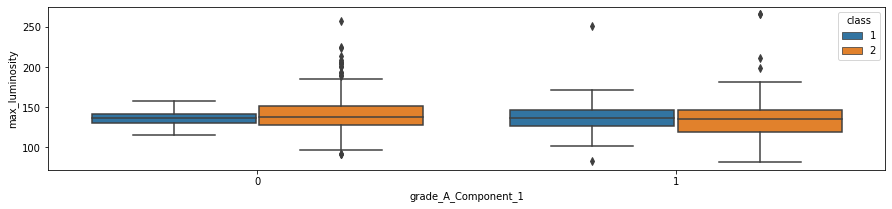

In [5095]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='max_luminosity',hue='class')

# Thickness

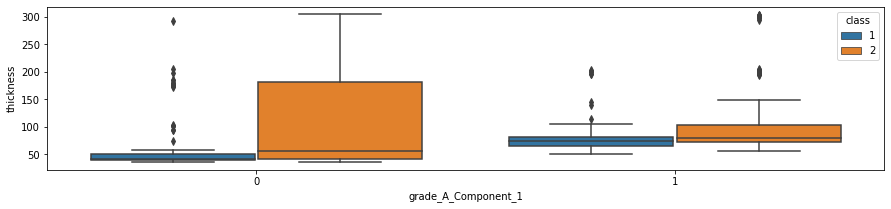

In [5096]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='thickness',hue='class')

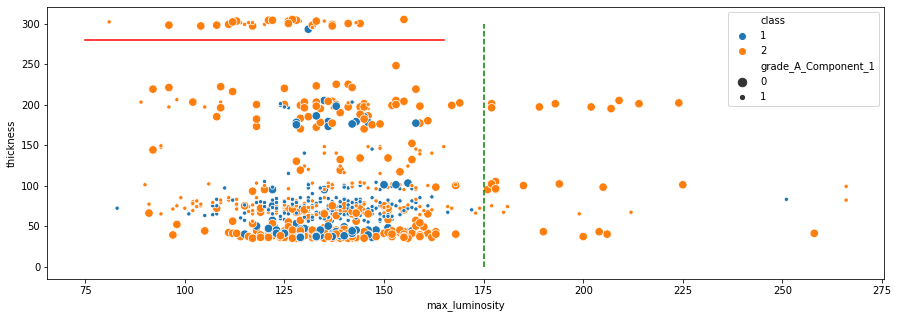

In [5097]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='max_luminosity',y='thickness',hue='class',size='grade_A_Component_1')
plt.plot([175,175],[0,300], 'g--')
plt.plot([75,165],[280,280], 'r-')

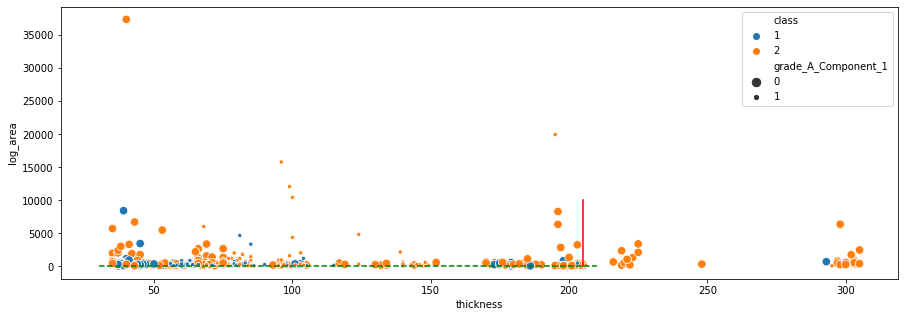

In [5098]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['thickness'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([205,205],[40,10000], 'r-')

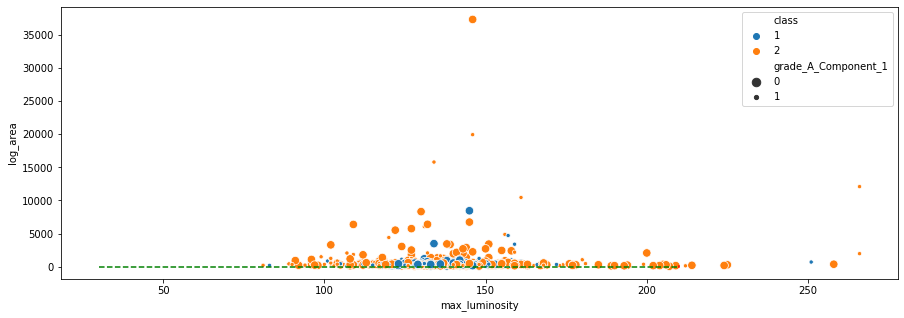

In [5099]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['max_luminosity'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([210,210],[4,10], 'r-')

train.log_area = np.log1p(train['log_area'])
test.log_area = np.log1p(test['log_area'])

In [5100]:
train.shape, test.shape

((749, 16), (326, 15))

In [5101]:
ind_2 = []
ind_2.extend(train[train.max_luminosity>175].index.tolist())
ind_2.extend(train[train.thickness>280].index.tolist())
#ind_2.extend(train[train.log_area>7.4].index.tolist())
train.drop(index = set(ind_2), inplace = True)
train.reset_index(drop = True, inplace = True)
len(ind_2)

63

In [5102]:
ind_2 = []
ind_2.extend(test[test.max_luminosity>175].index.tolist())
ind_2.extend(test[test.thickness>280].index.tolist())
#ind_2.extend(test[test.log_area>7.4].index.tolist())
test.drop(index = set(ind_2), inplace = True)
len(set(ind_2))
ind_2 = set(ind_2)

In [5103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 578
Data columns (total 15 columns):
grade_A_Component_1    306 non-null int64
grade_A_Component_2    306 non-null int64
max_luminosity         306 non-null int64
thickness              306 non-null int64
xmin                   306 non-null int64
xmax                   306 non-null int64
ymin                   306 non-null int64
ymax                   306 non-null int64
pixel_area             306 non-null int64
log_area               306 non-null float64
x_component_1          306 non-null int64
x_component_2          306 non-null int64
x_component_3          306 non-null int64
x_component_4          306 non-null int64
x_component_5          306 non-null int64
dtypes: float64(1), int64(14)
memory usage: 38.2 KB


In [5104]:
len(ind_1), len(ind_2)

(257, 20)

In [5105]:
326-20

306

In [5106]:
train['y_diff'] = train['ymax'] - train['ymin']
#train['diff_area'] = train['log_area'] - train['pixel_area']
#train['area'] = train.y_diff * train.x_diff

test['y_diff'] = test['ymax'] - test['ymin']
#test['diff_area'] = test['log_area'] - test['pixel_area']
#test['area'] = test.y_diff * test.x_diff

train.y_diff = np.where(train.y_diff>0, 1, 0)
test.y_diff = np.where(test.y_diff>0, 1, 0)

#train['mul'] = train['max_luminosity'] + train['thickness']
#test['mul'] = test['max_luminosity'] + test['thickness']

train.drop(columns = [ 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
test.drop(columns = [ 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
#test.drop(columns = ['grade_A_Component_2','x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)

In [5107]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,class,y_diff
0,1,0,135,65,950,974,1038442,1036754,300.120598,2,0


1.528619904220497 4.483917772475493


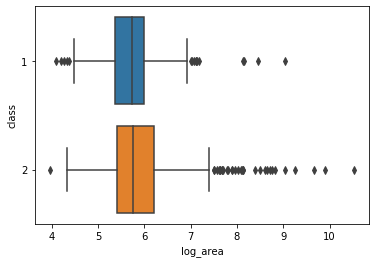

In [5108]:
sns.boxplot(np.log1p(train.log_area), train['class'])
print(np.log1p(train.log_area).skew(), np.log1p(train.log_area).kurt())

In [5109]:
train.log_area = np.log1p(train.log_area)
test.log_area = np.log1p(test.log_area)

In [5110]:
q1 = train.log_area.quantile(.25)
q3 = train.log_area.quantile(.75)
iqr = q3-q1

upper = q3 + 2.5 * iqr
lower = q1 - 2.5 * iqr
print(q3+2.5*iqr, q1-2.5*iqr)
train.log_area.apply(lambda x: True if x>upper or x<lower else False).value_counts()

7.835504494169337 3.640292510919871


False    662
True      24
Name: log_area, dtype: int64

In [5111]:
d = train[train.log_area.apply(lambda x: True if x>upper or x<lower else False)].index.tolist()
train.drop(index = d, inplace = True)
train.reset_index(drop = True, inplace = True)

In [5112]:
test.log_area = test.log_area.apply(lambda x: upper if x>upper else x) 
test.log_area = test.log_area.apply(lambda x: lower if x<lower else x)

In [5113]:
train.ymax = np.sqrt(train.ymax)
train.ymin = np.sqrt(train.ymin)

test.ymax = np.sqrt(test.ymax)
test.ymin = np.sqrt(test.ymin)

In [5114]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,class,y_diff
0,1,0,135,65,950,974,1019.039744,1018.211177,5.707511,2,0


In [5115]:
train['diff_x'] = (train.xmax - train.xmin)
train['diff_y'] = (train.ymax - train.ymin)

train['euclidean'] = np.sqrt((train.diff_x)**2 + (train.diff_y)**2)

test['diff_x'] = (test.xmax - test.xmin)
test['diff_y'] = (test.ymax - test.ymin)

test['euclidean'] = np.sqrt((test.diff_x)**2 + (test.diff_y)**2)

In [5116]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,class,y_diff,diff_x,diff_y,euclidean
0,1,0,135,65,950,974,1019.039744,1018.211177,5.707511,2,0,24,-0.828568,24.014298


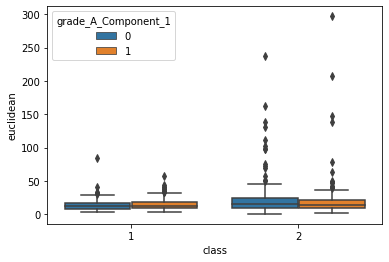

In [5117]:
sns.boxplot(train['class'], train.euclidean, hue = train.grade_A_Component_1)

In [5118]:
label = train['class']
del train['class']
label = label.astype('int')

In [5119]:
train.shape, label.shape, test.shape

((662, 13), (662,), (306, 13))

In [5120]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff,diff_x,diff_y,euclidean
0,1,0,135,65,950,974,1019.039744,1018.211177,5.707511,0,24,-0.828568,24.014298


func = {'max_luminosity':['mean', 'median', 'sum', 'min', 'max'], 
        'thickness':['mean', 'median', 'sum', 'min', 'max'],
        'xmin': ['mean', 'median', 'sum', 'min', 'max'],
        'xmax': ['mean', 'median', 'sum', 'min', 'max'],
        'ymin': ['mean', 'median', 'sum', 'min', 'max'],
        'ymax': ['mean', 'median', 'sum', 'min', 'max'],
        'log_area': ['mean', 'median', 'sum', 'min', 'max'],
       }
temp_2  = train.groupby(['grade_A_Component_1','y_diff']).agg(func)
temp_2.columns = ['_grade_'.join(c) for c in temp_2.columns.values]

train = train.merge(temp_2, on = ['grade_A_Component_1','y_diff'], how = 'left', sort=False)



In [5121]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff,diff_x,diff_y,euclidean
0,1,0,135,65,950,974,1019.039744,1018.211177,5.707511,0,24,-0.828568,24.014298


In [5122]:
train['sum'] = np.sum(train, axis = 1)
train['mean'] = np.mean(train, axis = 1)
train['median'] = np.median(train, axis = 1)
train['max'] = np.max(train, axis = 1)
train['skew'] = train.skew(axis = 1)
train['kurt'] = train.kurt(axis = 1)

test['sum'] = np.sum(test, axis = 1)
test['mean'] = np.mean(test, axis = 1)
test['median'] = np.median(test, axis = 1)
test['max'] = np.max(test, axis = 1)
test['skew'] = test.skew(axis = 1)
test['kurt'] = test.kurt(axis = 1)

In [5123]:
mm = MinMaxScaler(feature_range=(0,1))
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns, index = train.index)
test = pd.DataFrame(mm.fit_transform(test), columns = test.columns, index = test.index)

In [5124]:
test.head(5)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff,diff_x,diff_y,euclidean,sum,mean,median,max,skew,kurt
1,0.0,1.0,0.877863,0.336842,0.072600,0.070885,0.105212,0.105346,0.508328,0.0,0.008511,0.576032,0.008455,0.083658,0.083658,0.204955,0.083658,0.639687,0.668709
4,1.0,0.0,0.755725,0.210526,0.012881,0.039836,0.672798,0.672863,0.704576,0.0,0.112766,0.593302,0.112696,0.511265,0.511265,0.108109,0.511265,0.044767,0.044626
9,0.0,1.0,0.732824,0.752632,0.359485,0.359695,0.003456,0.004448,0.175831,1.0,0.014894,0.798281,0.015403,0.127982,0.127982,0.203792,0.127982,0.505419,0.528241
10,0.0,1.0,0.816794,0.515789,0.047424,0.050381,0.346051,0.346285,0.636845,1.0,0.025532,0.617979,0.025455,0.265938,0.265938,0.166667,0.265938,0.224828,0.233076
12,0.0,1.0,0.641221,0.052632,0.283958,0.288225,0.323405,0.323616,0.548906,1.0,0.029787,0.610411,0.029710,0.330358,0.330358,0.083333,0.330358,0.495845,0.541298


# ML

In [5125]:
train.shape, label.shape, test.shape

((662, 19), (662,), (306, 19))

In [5126]:
prediction =[]
def kfold(model,train,label, test, Random_state):
    
    pred_te = pd.DataFrame(np.zeros(shape = (306,10)), index = test.index)
    i = 0
    
    strat = StratifiedShuffleSplit(n_splits=5, random_state=Random_state)
    for tr_index, val_index in (strat.split(train,label)):
            x_train, x_val  = train.loc[tr_index,:],train.loc[val_index,:]
            y_train, y_val = label[tr_index], label[val_index]
            
            model.fit(x_train, y_train)
            tr_pred = model.predict_proba(x_train)
            val_pred = model.predict_proba(x_val)
            
            print('Training Loss : {},   Validation Loss : {}'.format(log_loss(y_train, tr_pred), log_loss(y_val, val_pred)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(accuracy_score(tr_pred, y_train), accuracy_score(val_pred, y_val)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(classification_report(tr_pred, y_train), classification_report(val_pred, y_val)))
    #return(model)
            pred_te.iloc[:,i:i+2]  = model.predict_proba(test)
            i = i+2
    return(pred_te, model)

In [5127]:
model = kfold(GradientBoostingClassifier(random_state=130),train,label,test,310)

Training Loss : 0.2801263450352034,   Validation Loss : 0.5687626524852715
Training Loss : 0.27464644641607067,   Validation Loss : 0.571379451413498
Training Loss : 0.29358129408048816,   Validation Loss : 0.5621692631037383
Training Loss : 0.2799140439538972,   Validation Loss : 0.5274906116425858
Training Loss : 0.2860808217767902,   Validation Loss : 0.6224284468996916


In [5131]:
model = kfold(StackingClassifier(final_estimator = LogisticRegression(random_state=13), estimators = 
                                 [('rf', RandomForestClassifier(random_state=130)),
                                  ('rf_tune', gs.best_estimator_),
                                  ('gb', GradientBoostingClassifier(random_state=130))]),train,label,test,310)

Training Loss : 0.20818185452636112,   Validation Loss : 0.530283289719832
Training Loss : 0.2264758722599937,   Validation Loss : 0.54364869432032
Training Loss : 0.22624927138824116,   Validation Loss : 0.5265644978195305
Training Loss : 0.2231337094731043,   Validation Loss : 0.5093269142600957
Training Loss : 0.2261475342501266,   Validation Loss : 0.5732263769052375


# TUNE

In [4949]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer

In [4946]:
weight = compute_class_weight('balanced', np.unique(label), label)

In [4952]:
weight

array([1.21691176, 0.84871795])

In [4953]:
label.value_counts()

2    390
1    272
Name: class, dtype: int64

In [4965]:
%%time
param = [{'bootstrap':[True], 'class_weight': ['balanced'],
          'criterion':['gini'], 'max_depth':[2,3,4,5,7],
          'n_jobs':[-1], 'random_state':[123321], 'max_leaf_nodes':[3,4,5,7,9,12,18],
        'max_samples':[3,5,8,10,14,19,28]
         }]

Wall time: 0 ns


In [4966]:
def func(ytrue, ypred):
    return(log_loss(ytrue, ypred))
me = make_scorer(func, greater_is_better=False)

In [4967]:
%%time
gs = GridSearchCV(RandomForestClassifier(), param_grid=param, cv = 3, scoring=me)
gs.fit(train,label)

Wall time: 3min 14s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid=[{'bootstrap': [True], 'class_weight': ['ba

In [4971]:
gs.best_estimator_, gs.best_score_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=2, max_features='auto',
                        max_leaf_nodes=3, max_samples=3,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123321,
                        verbose=0, warm_start=False),
 -14.19139441396537)

In [4975]:
gs.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'max_samples': 3,
 'n_jobs': -1,
 'random_state': 123321}

In [5064]:
pred, model = kfold(RandomForestClassifier(random_state = 5410, n_estimators=300), train,label,test,5410)

Training Loss : 0.14987196654447188,   Validation Loss : 0.5170292998542616
Training Loss : 0.1493990755086855,   Validation Loss : 0.5636281046383095
Training Loss : 0.14197409375525566,   Validation Loss : 0.7143412312444531
Training Loss : 0.14559936923520292,   Validation Loss : 0.5929164333195995
Training Loss : 0.15134878968815857,   Validation Loss : 0.5135257569027579


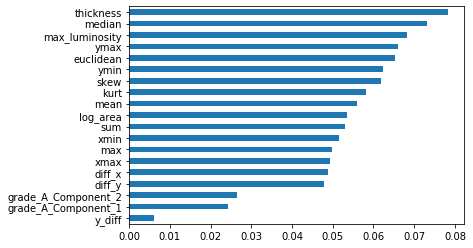

In [5065]:
pd.Series(model.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()

In [5134]:
pred = model[0]

In [5135]:
pred

,0,1,2,3,4,5,6,7,8,9
1,0.117944,0.882056,0.135194,0.864806,0.130534,0.869466,0.168564,0.831436,0.131076,0.868924
4,0.319474,0.680526,0.317528,0.682472,0.348646,0.651354,0.397386,0.602614,0.287017,0.712983
9,0.179257,0.820743,0.234511,0.765489,0.219196,0.780804,0.394009,0.605991,0.303604,0.696396
10,0.177478,0.822522,0.217294,0.782706,0.224150,0.775850,0.257696,0.742304,0.253692,0.746308
12,0.235427,0.764573,0.181664,0.818336,0.217264,0.782736,0.189260,0.810740,0.186291,0.813709
13,0.630567,0.369433,0.517517,0.482483,0.620134,0.379866,0.588012,0.411988,0.599294,0.400706
15,0.126724,0.873276,0.133897,0.866103,0.132570,0.867430,0.128367,0.871633,0.123914,0.876086
17,0.296178,0.703822,0.313161,0.686839,0.337202,0.662798,0.394916,0.605084,0.266966,0.733034
18,0.745824,0.254176,0.687034,0.312966,0.754529,0.245471,0.725226,0.274774,0.730023,0.269977
19,0.231011,0.768989,0.327737,0.672263,0.487378,0.512622,0.275463,0.724537,0.321642,0.678358


In [5136]:
pred['final_0'] = np.mean(pred[[0,2,4,6,8]], axis = 1)
pred['final_1'] = np.mean(pred[[1,3,5,7,9]], axis = 1)

In [5137]:
final = pred[['final_0', 'final_1']]
final.columns = [1,2]

In [5138]:
#final = pd.DataFrame(pred, index=test.index, columns = [1,2])

In [5139]:
final.head()

,1,2
1,0.136662,0.863338
4,0.334010,0.665990
9,0.266115,0.733885
10,0.226062,0.773938
12,0.201981,0.798019


In [5140]:
len(ind_2),len(ind_1)

(20, 257)

In [5141]:
df_1 = pd.DataFrame({1:[1.0 for i in range(1,258)],   2:[0.0 for i in range(1,258)]}, index=ind_1).sort_index()
df_2 = pd.DataFrame({1:[0.0 for i in range(1,21)],   2:[1.0 for i in range(1,21)]}, index=ind_2).sort_index()

In [5142]:
answer = pd.concat([final, df_1, df_2]).sort_index()

In [5143]:
answer.head(20)

,1,2
0,1.000000,0.000000
1,0.136662,0.863338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.334010,0.665990
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,0.266115,0.733885


In [5144]:
answer.to_excel('Stacktune_rf_mean.xlsx', index = False)

In [5145]:
answer.shape

(583, 2)

In [5146]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 2 columns):
1    583 non-null float64
2    583 non-null float64
dtypes: float64(2)
memory usage: 13.7 KB
